In [2]:
import pandas as pd
df = pd.read_csv("/Users/rezukarkee/Downloads/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
#basic info of dataset
df.shape
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
#convert dates
df['Order Date'] = df['Order Date'].astype(str)
df['Ship Date'] = df['Ship Date'].astype(str)

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [15]:
#monthly sales trend
df['Month'] = df['Order Date'].dt.month_name()
df['Month_num'] = df['Order Date'].dt.month

monthly_sales = df.groupby(['Month_num', 'Month']) ['Sales'].sum().reset_index().sort_values('Month_num')
monthly_sales

,Month_num,Month,Sales
0,1.0,January,90957.9824
1,2.0,February,103951.1600
2,3.0,March,71788.6906
3,4.0,April,65094.9490
4,5.0,May,64277.0788
5,6.0,June,51099.1360
6,7.0,July,62393.9465
7,8.0,August,100560.3526
8,9.0,September,66582.3650
9,10.0,October,62563.7830


In [16]:
#tells us which region performs best
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

In [17]:
#sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

In [18]:
#sales by segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

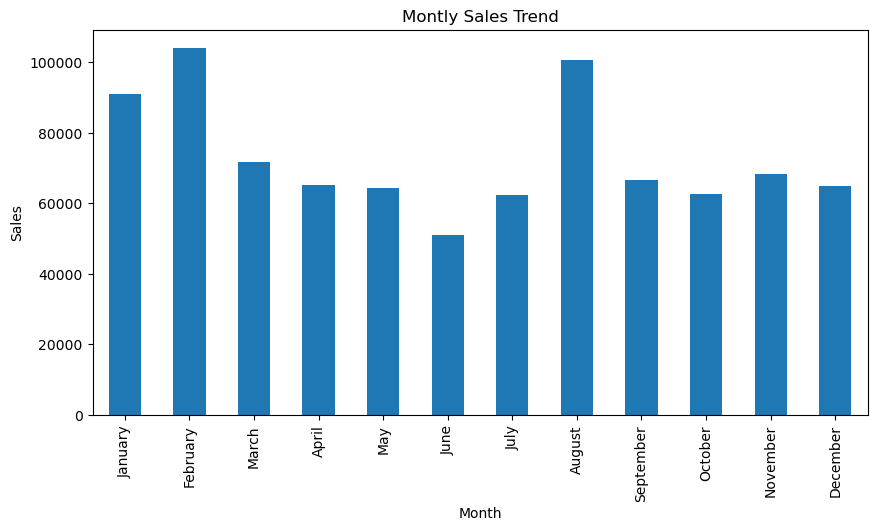

In [21]:
#Simple sales chart
import matplotlib.pyplot as plt

monthly_sales = monthly_sales.set_index('Month')
monthly_sales['Sales'].plot(kind='bar', figsize=(10,5), title="Montly Sales Trend")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

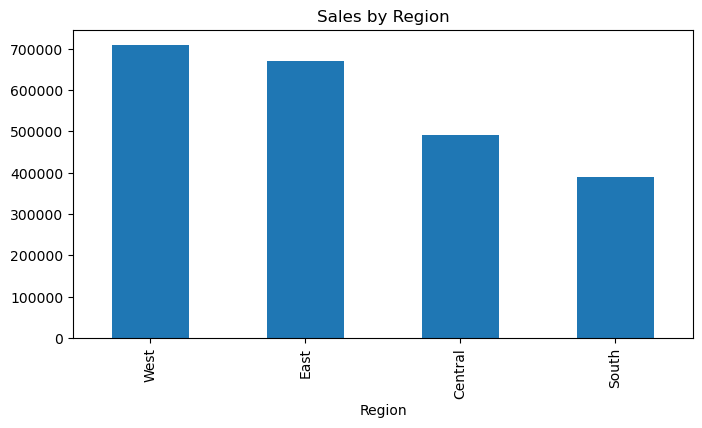

In [20]:
region_sales.plot(kind='bar', figsize=(8,4), title="Sales by Region")
plt.show()